# Joseph (Alex) McGraw - jam27652
# Alexandre Nicolaï - an29675


# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, September 14 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Challenges in Data Science (10 pts)

Refer to the Domino guide under Modules --> Additional Resources

Section 2 describes 8 Challenges. You may have personally encountered or heard of somebody else who encountered some of these challenge. If so, please write 1-2 paragraphs on what situation was encountered and how it mapped into one the mentioned challenges. If not, think of a hypothetical case and do the same exercise.

# Question 2: Guess the coin (5+5 = 10 points)

Assume we are playing a guessing game with a friend. The friend has three coins at hand:
* **Coin A**: a fair coin with equal probability of being head (H ) or tail (T)
* **Coin B**: a biased coin with a probability of 0.75 being head (H)
* **Coin C**: a coin with a probability of $P^*(H)$ being head (H)

The friend secretly picked one of the coins, randomly flipped it a few times, and get a sequence of *HTHHTT* (all of which come from the same coin he picked). 

1. If you had to choose between whether **Coin A** or **Coin B** was used, and you prefer the one which is more likely, which one will you choose?  (5 points)
2. What would be the value of  $P^*(H)$ such that **Coin C** corresponds to the most likely (among infinite possible coins) coin to have produced the observed sequence?(i.e. provide  an analytical derivation for $P^*(H)$ using maximum likelihood estimation (MLE))."

## Answer

1. Coin A

2. 31.25%

$$\frac{\partial}{\partial P^*(H)}P^*(H)^3*(1-P^*(H))^3=0$$
$$<=>3P^*(H)^2*(1-P^*(H))^3-3P^*(H)^3*(1-P^*(H))^2=0$$
$$<=>P^*(H)^2*(1-P^*(H))^2*[3*(1-P^*(H))-3P^*(H)]=0$$
$$<=>P^*(H)^2(1-P^*(H))^2*[3-6P^*(H)]=0$$
$$=>P^*(H)=0,3125$$

# Question 3: Multiple Linear Regression (30 pts)

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be developed using machine friendly data and the weight of fish can be predicted. Use the following code to import the Fish market prices dataset in python. The dataset is taken from https://www.kaggle.com/aungpyaeap/fish-market.

In [1]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
pd.options.mode.chained_assignment = None
%matplotlib inline


df = pd.read_csv("fish_mkt.csv", index_col=0)
df = df[-df.isin([0,np.nan,np.inf,-np.inf]).any(1)]
df.head()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Here,
1. Species: Species name of fish
2. Weight: Weight of fish in gram
3. Length1: Vertical length in cm
4. Length2: Diagonal length in cm
5. Length3: Cross length in cm
6. Height: Height in cm
7. Width: Diagonal width in cm

In [2]:
df = df.fillna(0)
X = df.drop(['Weight'], axis=1)
y = df['Weight']

Consider the `Weight` column to be your target variable.

a. (2 pts)  Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the [$R^2$ (coefficient of determination)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) value.

d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot [here](https://seaborn.pydata.org/generated/seaborn.pairplot.html). How does the pairplot validate your previous answer?

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and $R^2$. Explain the results.

f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

## Answer

a. (2 pts) Print the shape (number of rows and columns) of the feature matrix X, and print the first 5 rows.

In [3]:
print(X.shape)
print(X.head())

(158, 5)
         Length1  Length2  Length3   Height   Width
Species                                            
Bream       23.2     25.4     30.0  11.5200  4.0200
Bream       24.0     26.3     31.2  12.4800  4.3056
Bream       23.9     26.5     31.1  12.3778  4.6961
Bream       26.3     29.0     33.5  12.7300  4.4555
Bream       26.5     29.0     34.0  12.4440  5.1340


b. (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset. Report the regression coefficient of each input feature and evaluate the model using mean absolute error (MAE). Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

In [4]:
random.seed(1)
reg = linear_model.LinearRegression()
reg.fit(X, y)
coefficient = reg.coef_
print(coefficient)

prediction = reg.predict(X)
MAE = mean_absolute_error(y, prediction)
MAE

[ 63.96945622  -9.10851306 -28.11886474  27.9262076   23.41231976]


91.7123336496042

c. (6 pts) Split the data into a training set and a test set, using the train_test_split with test_size = 0.25 and random_state = 50. Fit an MLR using the training set. Evaluate the trained model using the training set and the test set, respectively. Compare the two MAE values thus obtained. Report the  𝑅2
R
2
  (coefficient of determination) value.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 50)
MLR_train = linear_model.LinearRegression()
MLR_train.fit(X_train, y_train)
train_predict = MLR_train.predict(X_train)
test_predict = MLR_train.predict(X_test)
train_MAE = mean_absolute_error(y_train, train_predict)
test_MAE = mean_absolute_error(y_test, test_predict)
print(f'Train MAE is %.2f' %train_MAE, f'\nTest MAE is %.2f' %test_MAE)
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print(f'Train r2^2 is %.2f' %train_r2, f'\nTest r2^2 is %.2f' %test_r2)

print('The MAE on the train dataset is lower that on the test dataset.')



Train MAE is 86.08 
Test MAE is 97.82
Train r2^2 is 0.87 
Test r2^2 is 0.90
The MAE on the train dataset is lower that on the test dataset.


d. (5 pts) Calculate the pearson correlation matrix of the independent variables in the training set. Report the variables which have magnitude of correlation greater than 0.8 w.r.t the variable 'Length2'. Now, plot a pairplot based on Species column as seen in the 2nd plot here. How does the pairplot validate your previous answer?

Length1    0.999415
Length3    0.993202
Width      0.851321
dtype: float64
If we take the first diagonal of the pairplot, we can see that the features length1 and length3 are the ones with a slope almost equal to one. It means that almost all the information contained in those features is also contained in lenght 2. Also, width presents a slope close to one but knows more outliers as the correlation with length2 is lower than for the two others


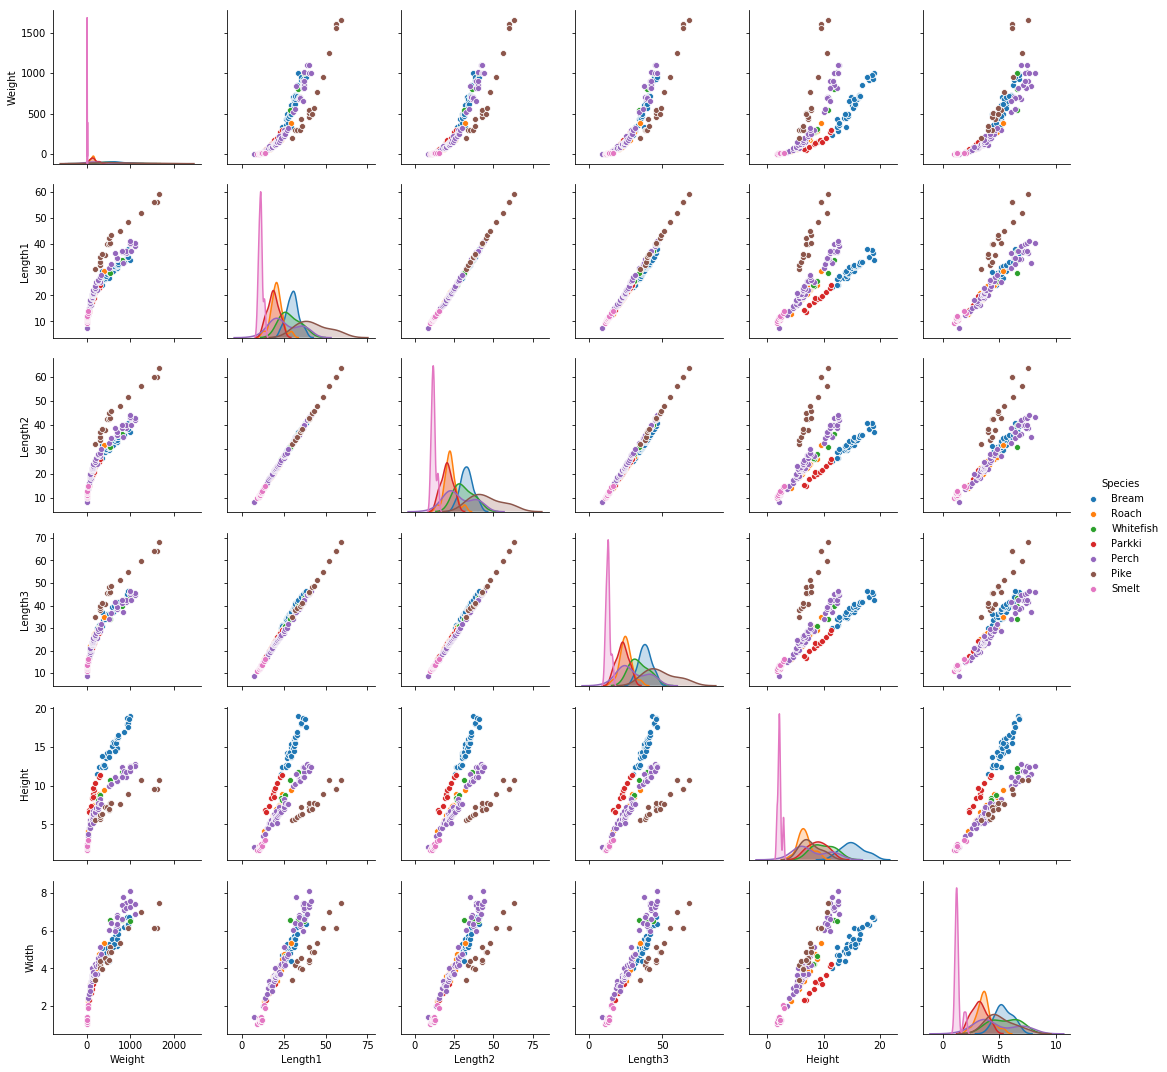

In [6]:
X_corr = X_train.drop(['Length2'], axis=1)
y_corr = X_train['Length2']
length2_correl = X_corr.corrwith(y_corr)
above = length2_correl[length2_correl > .8]

correl = df.corr()
print(above)
sns.pairplot(df.reset_index(), hue='Species')

print('If we take the first diagonal of the pairplot, we can see that the features length1 and length3 are the ones with a slope almost equal to one. It means that almost all the information contained in those features is also contained in lenght 2. Also, width presents a slope close to one but knows more outliers as the correlation with length2 is lower than for the two others')

e. (6 pts) Plot the histogram of Y_train and see its distribution. Now take log of Y_train and plot its histogram. Now run regression again after taking log and compare the MAE. You need to do np.exp(predictions) to bring them back to original scale, and then calculate MAE and  𝑅2
R
2
 . Explain the results.

(array([ 2.,  5.,  1.,  1.,  0.,  2.,  5.,  7., 21.,  9., 16., 14., 16.,
        17.,  2.]),
 array([1.77495235, 2.14847279, 2.52199323, 2.89551366, 3.2690341 ,
        3.64255454, 4.01607497, 4.38959541, 4.76311585, 5.13663629,
        5.51015672, 5.88367716, 6.2571976 , 6.63071803, 7.00423847,
        7.37775891]),
 <a list of 15 Patch objects>)

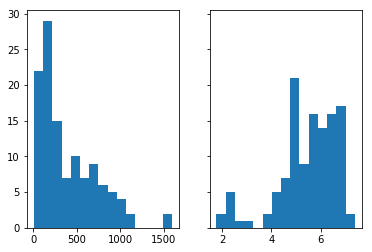

In [7]:
y_log = np.log(y_train)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(y_train, bins = 15)
ax2.hist(y_log, bins = 15)


In [8]:
log_reg = linear_model.LinearRegression()
log_reg.fit(X_train, y_log)
train_log_pred = log_reg.predict(X_train)
test_log_pred = log_reg.predict(X_test)



train_log_MAE = mean_absolute_error(y_train, np.exp(train_log_pred))
train_log_r2 = r2_score(y_train, np.exp(train_log_pred))
test_log_MAE = mean_absolute_error(y_test, np.exp(test_log_pred))
test_log_r2 = log_reg.score(X_test, np.log(y_test))



print('Train Log MAE is', train_log_MAE)
print('Train Log r^2 is', train_log_r2)
print('Test Log MAE is', test_log_MAE)
print('Test Log r^2 is', test_log_r2)



Train Log MAE is 95.5835733539025
Train Log r^2 is 0.6973650153179152
Test Log MAE is 177.96160694578722
Test Log r^2 is 0.9299268036019486


f. (5 pts) Rank the features in descending order based on their significance. You might find this link to be helpful: http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html.

In [9]:
selector = RFE(reg, n_features_to_select = 1, step=1)
selector = selector.fit(X, y)
ranking = selector.ranking_
print(ranking)
X.columns
significance_desc = [X['Length1'].name, X['Height'].name, X['Width'].name, X['Length2'].name, X['Length3'].name]
significance_desc

data = {'Variables': significance_desc,
       'Ranking': ranking}
significant_features = pd.DataFrame(data, columns = ['Variables', 'Ranking'])
significant_features.sort_values(by = 'Ranking', ascending = False)

[2 5 1 3 4]


,Variables,Ranking
1,Height,5
4,Length3,4
3,Length2,3
0,Length1,2
2,Width,1


g. (Bonus question - 5 pts) Use the Species column for one-hot encoding and perform part c of this question. Explain your results.

In [10]:
from sklearn.preprocessing import OneHotEncoder

#initializing the One Hot Encoder
enc = OneHotEncoder(handle_unknown='ignore')
X_onehot = X.reset_index()
enc_df = pd.DataFrame(enc.fit_transform(X_onehot[['Species']]).toarray())
X_onehot = X_onehot.join(enc_df)


In [11]:
X_onehot = X_onehot.drop(columns=['Species', 6])
X_train_hot, X_test_hot, y_train_hot, y_test_hot = train_test_split(X_onehot, y, test_size = .25, random_state = 50)
MLR_train_hot = linear_model.LinearRegression()
MLR_train.fit(X_train_hot, y_train_hot)
train_predict_hot = MLR_train.predict(X_train_hot)
test_predict_hot = MLR_train.predict(X_test_hot)
train_MAE_hot = mean_absolute_error(y_train_hot, train_predict_hot)
test_MAE_hot = mean_absolute_error(y_test_hot, test_predict_hot)
print(f'Train MAE is %.2f' %train_MAE_hot, f'\nTest MAE is %.2f' %test_MAE_hot)
train_r2_hot = r2_score(y_train_hot, train_predict_hot)
test_r2_hot = r2_score(y_test_hot, test_predict_hot)

print(f'Train r2^2 is %.2f' %train_r2_hot, f'\nTest r2^2 is %.2f' %test_r2_hot)


Train MAE is 63.16 
Test MAE is 72.61
Train r2^2 is 0.93 
Test r2^2 is 0.94


The One Hot Encoder takes each categorical variable of species and converts them into binomial variable columns.
 1 for if it is that species, and 0 for if it is not. After this, we dropped the "Species" column as to not have strings in the variables, and also dropped the "6" column that was created through the One Hot Encoder to account for a dummy variable. These added binomial variables decreased the MAEs and increased the r2^2 score, because the model was able to take into account different species of fish (categorical variables), along with their numberic variables.

# Question 4 (30 pts)

Using the same data from the previous question, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. Use the same train and test data with additional augmented columns from before. Scale the data so that each of the independent variables have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this.

    from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MAE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for all variables. (5pts)

5) Why did we have to scale the data before regularization? (5pts)

## Answer

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a 5-fold cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from  𝜆=1010
λ
=
10
10
  to  𝜆=10−2
λ
=
10
−
2
 . In Python, you can consider this range of values as follows:
  import numpy as np

  alphas =  10**np.linspace(10,-2,100)*0.5
Report the best chosen  𝜆
λ
  based on cross validation. The cross validation should happen on your training data using average MAE as the scoring metric. (8pts)

In [12]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold, GridSearchCV
import sklearn
import warnings; warnings.simplefilter('ignore')
scale_x_tr = scale(X_train)
scale_x_te = scale(X_test)
scale_y_tr = scale(y_train)
scale_y_te = scale(y_test)


In [13]:
# Lasso Model
lasso = Lasso(random_state = 0)
alphas = 10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring='neg_mean_absolute_error')
clf.fit(scale_x_tr, scale_y_tr)

print('The best lambda score for lasso is', clf.best_params_)
#print('The best lambda score for lasso is', clf.best_estimator_)
#print('The average MAE score for the given given lambda', clf.best_score_)

# Ridge Model
ridge = Ridge(random_state = 0)

ridge_reg = GridSearchCV(ridge, tuned_parameters, cv=n_folds, scoring='neg_mean_absolute_error')
ridge_reg.fit(scale_x_tr, scale_y_tr)

print('\nThe best lambda score ridge is', ridge_reg.best_params_)
#print('The average MAE score for the given given alpha', ridge_reg.best_score_)




The best lambda score for lasso is {'alpha': 0.005}

The best lambda score ridge is {'alpha': 0.06164233697210317}


In [14]:
ex = Ridge(alpha = alphas[0]).fit(scale_x_tr, scale_y_tr)
ex.coef_

array([2.12403481e-08, 2.13500101e-08, 2.14968429e-08, 1.69839116e-08,
       2.07062913e-08])

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot. What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

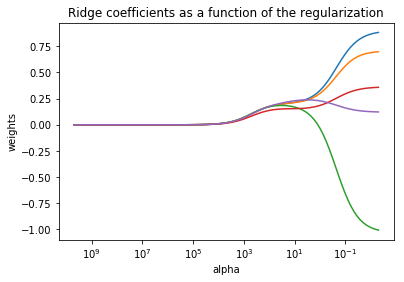

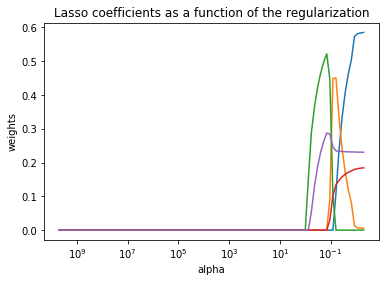

In [15]:
ridge_coefs = []
lasso_coefs = []
for alpha in alphas:
    ridge = Ridge(alpha = alpha, fit_intercept = False).fit(scale_x_tr, scale_y_tr)
    lasso = Lasso(alpha = alpha, fit_intercept = False).fit(scale_x_tr, scale_y_tr)
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)


ax1 = plt.gca()
ax1.plot(alphas, ridge_coefs)
ax1.set_xscale('log')
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

ax2 = plt.gca()
ax2.plot(alphas, lasso_coefs)
ax2.set_xscale('log')
ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MAE) on the test data for each. (5pts)

In [16]:
linear = LinearRegression().fit(scale_x_tr, scale_y_tr)
linear_pred = linear.predict(scale_x_te)
linear_MAE = mean_absolute_error(scale_y_te, linear_pred)

lasso = Lasso(alpha=.005, max_iter = 10000, random_state=0).fit(scale_x_tr, scale_y_tr)
lasso_pred = lasso.predict(scale_x_te)
ridge = Ridge(alpha=.0616, max_iter = 10000, random_state=0).fit(scale_x_tr, scale_y_tr)
ridge_pred = ridge.predict(scale_x_te)
lasso_MAE = mean_absolute_error(scale_y_te, lasso_pred)
ridge_MAE = mean_absolute_error(scale_y_te, ridge_pred)

print(f'Linear MAE is %.5f' %linear_MAE)
print(f'Lasso MAE is %.5f' %lasso_MAE)
print(f'Ridge MAE is %.5f' %ridge_MAE)

Linear MAE is 0.24315
Lasso MAE is 0.24612
Ridge MAE is 0.24431


4) Run lasso again with cross validation using sklearn.linear_model.LassoCV. Set the cross validation parameters as follows:
LassoCV(alphas=None, cv=10, max_iter=10000)
Report the best  𝜆
λ
  based on cross validation. Run lasso on the training data using the best  𝜆
λ
  and report the coefficeints for all variables. (5pts)

In [17]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000).fit(scale_x_tr, scale_y_tr)

lasso = Lasso()
lasso.set_params(alpha = lasso_cv.alpha_).fit(scale_x_tr, scale_y_tr)
print(lasso.coef_)

[ 0.5880095   0.00441967 -0.          0.18632763  0.23056087]


5) Why did we have to scale the data before regularization? (5pts)

All 5 independent variables used to predict have different ranges. When creating these models, these different ranges will skew what an optimal lambda should be. Bringing all of them into the same scale will allow bring them back into a comparable scale, which will normalize these ranges and variances. 

# Question 5 (5 pts)

Lasso and ridge regularization techniques are often used to combat overfitting during linear regression. Which of the two yields more sparse models (i.e. fewer number of parameters) when the tuning parameter $\lambda$ is sufficiently large (but not infinite)?

## Answer

Lasso. Ridge will create non-zero betas for all parameters, while Lasso attempted to zero out some betas, to create a less complex model.